In [1]:
import ginsim
import pypint
import biolqm
import maboss

from colomoto_jupyter import tabulate
from colomoto.temporal_logics import *
from itertools import combinations
from functools import reduce

import sys
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame

This notebook has been executed using the docker image `colomoto/colomoto-docker:2020-04-13`

# Model of Human Monocyte to moDC differentation in vitro 

We have integrated published data on the main signaling cascades involved in the differentiation of monocytes into moDC. We also integrated novel putative transcriptional regulations inferred from the analysis of regulatory regions. Upon stimulation with IL4 and CSF2, monocytes differentiate intoDC, while upon stimulation by CSF2 but not IL4, they differentiate into Macrophages.

The model of monocyte to moDC differentation was implement with GINsim v3.0 (http://ginsim.org).

## GinSIM analysis

In [2]:
#Load the model
lrg = ginsim.load("Karen_MoDC_17april2020.zginml")
# Convert the model to BioLQM
lqm = ginsim.to_biolqm(lrg)

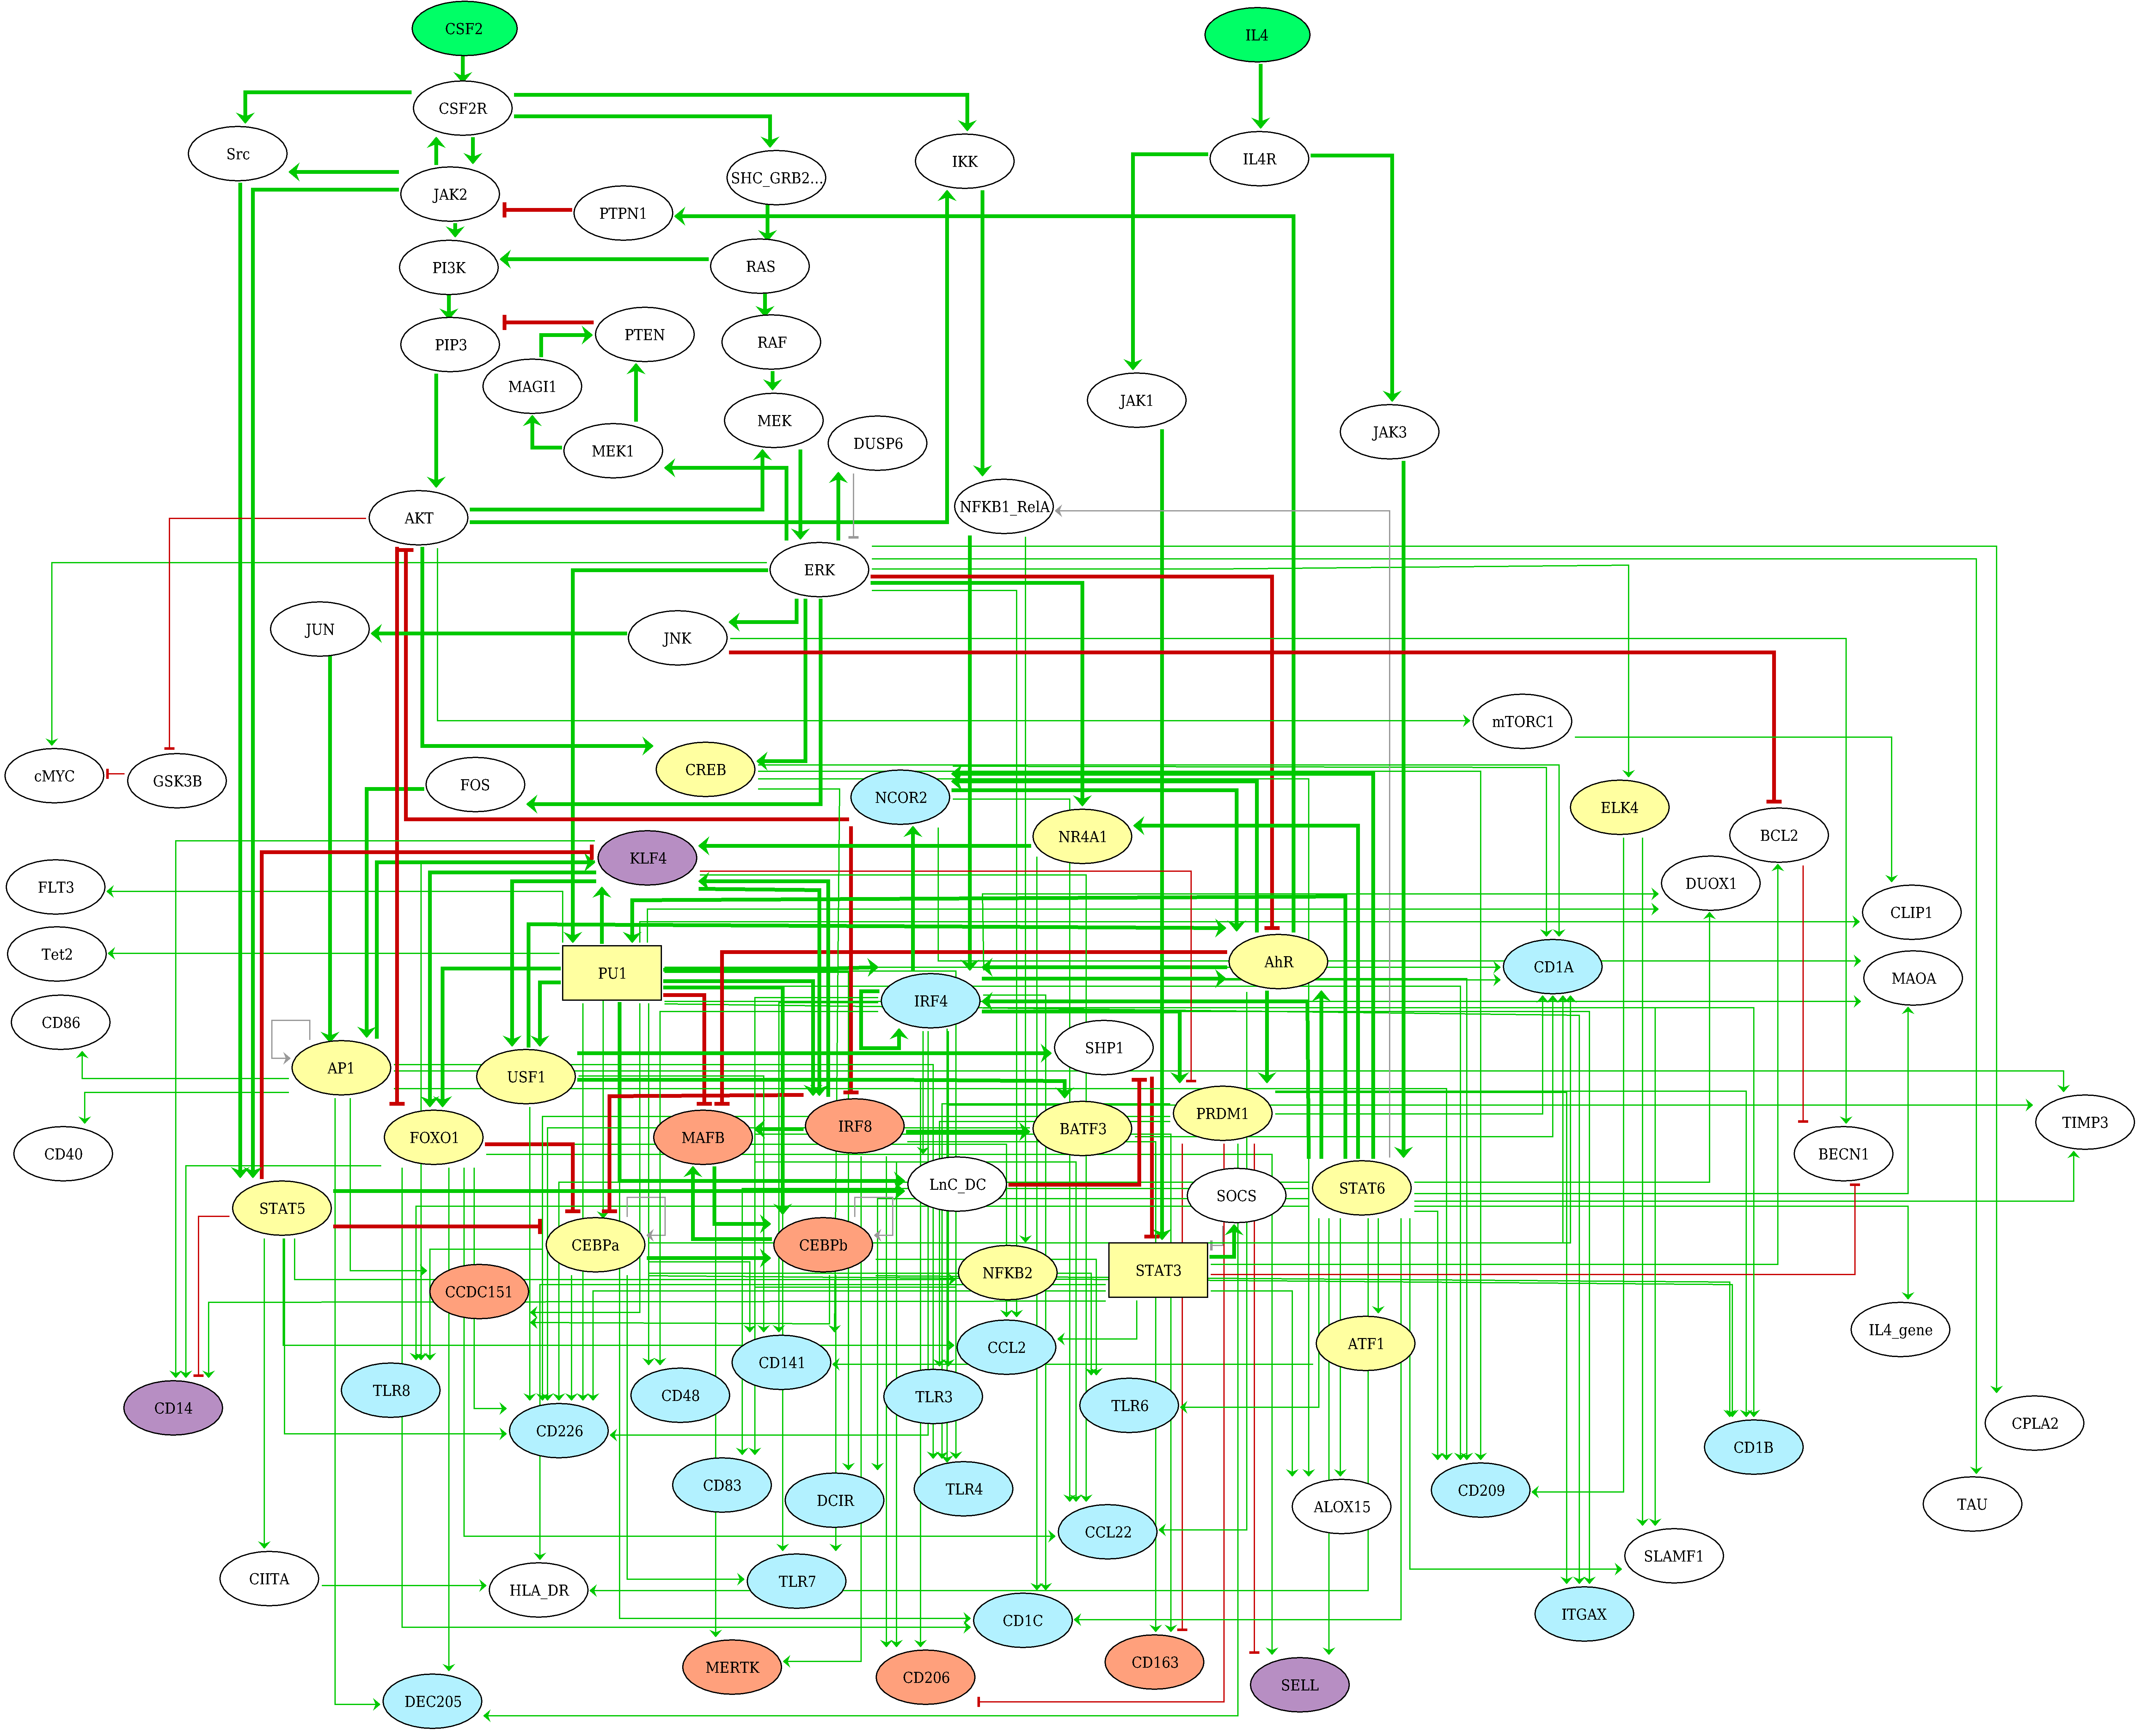

In [3]:
#Display the regulatory graph
ginsim.show(lrg)

The regulatory graph is compossed by 95 nodes, two fo those are the inputs: CSF2 and IL4 (in green), that are necesary for moDC differentiation. In yellow we have the transcription factors, in purple are the nodes that correspond to monocytes, in blue the specific moDC markers and in orange are the specific markers for macrophages.

## bioLQM analysis

In [4]:
# Define reporter components
reporter_components = ["CSF2R", "IL4R", "AhR", "IRF4", "IRF8", "MAFB", "KLF4", "STAT6", "CD1A", "CD209", "CCDC151", "CD206","SELL","CD14", "BECN1"]

In [5]:
# Find fixed points, also called stable states
fps = biolqm.fixpoints(lqm, autoconvert=False).project_on_components(reporter_components)
biolqm.states_to_dataframe(fps)

# Generation of a python dataframe containing all stable states, easy tbo filter.
fpsdf = biolqm.states_to_dataframe(biolqm.fixpoints(lqm, autoconvert=False))
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm, autoconvert=False).project_on_components(reporter_components))

# generation of a list of dictionaries for all stable states, easy to display.  
fpsdic = biolqm.fixpoints(lqm)

The stable states are stored in python structures. The folowing command returns the number of stable states found.

In [6]:
len(fpsdf)

4

The model has 4 stable states, which are displayed in a table by the following command line.

In [7]:
fpsdf

,CSF2,IL4,CSF2R,IL4R,AhR,AP1,ATF1,BATF3,CEBPa,CEBPb,FOS,cMYC,CREB,ELK4,FOXO1,IRF4,IRF8,KLF4,MAFB,NFKB1_RelA,NFKB2,NR4A1,PRDM1,PU1,STAT3,STAT5,STAT6,USF1,NCOR2,JAK2,Src,PI3K,PIP3,AKT,PTEN,MEK1,MAGI1,CLIP1,mTORC1,SHC_GRB2_mSOS,RAS,RAF,MEK,ERK,JUN,JNK,TAU,CPLA2,FLT3,GSK3B,IKK,JAK3,JAK1,SHP1,CIITA,ITGAX,LnC_DC,IL4_gene,DUOX1,SLAMF1,MAOA,HLA_DR,ALOX15,TIMP3,DUSP6,CCL2,CCL22,TLR3,TLR4,TLR6,TLR7,TLR8,CD48,CD1A,CD1B,CD1C,CD40,CD86,CD83,CD209,CD141,CD226,DEC205,DCIR,Tet2,PTPN1,SOCS,CD14,SELL,CD163,CD206,MERTK,CCDC151,BCL2,BECN1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0
2,1,0,1,0,0,1,0,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1
3,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,1,2,2,1,1,1,1,0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0


The stable states can be visualised directly on the network (drawn with GINsim) by using the following command, which is illustrated below for the stable state corresponding to moDC stage (with index 10).

In [8]:
# Displaying the moDC commitment stable state
ginsim.show(lrg,fpsdic[1])

'''#to save a specific state
img = ginsim.show(lrg, fpsdic[3])
with open("moDCs_csf2&il4_image.png", "wb") as out:
    out.write(img.data)
img.save("moDCs_csf2&il4.png")'''

AttributeError: 'Image' object has no attribute 'save'

These stable states can be projected onto a more compact set of markers.

In [ ]:
# Generation of a table listing all stable states projected on reporter components
fpsdfproj


These stable states correspond to nil, Monocyte, Macrophage and moDC fates, respectively. 

## Define mutant versions of the model and compute the corresponding stable state patterns

In [9]:
#List of perturbations to test
perturbations = ["PU1%0",
                "JAK3%0",
                "NCOR2%0",
                "AhR%0",
                "IRF4%0",
                "STAT6%1",
                "MAFB%0",
                "IRF8%0",
                "CEBPb%0"]

In [10]:
'''Define dictionaries to store attractors for each perturbation'''
fixpointlist = {}

'''trapspacelist is used for perturbations where no stable state is found
    to find eventual cyclic attractors.'''
trapspacelist = {}

for p in perturbations:
    fpsdf = biolqm.fixpoints(biolqm.perturbation(lqm, p))
    if(fpsdf):
        fixpointlist[p] = fpsdf
    else:
        '''No stable state found, so we look for cycles'''
        trapspace = biolqm.trapspace(biolqm.perturbation(lqm, p))
        trapspacelist[p] = trapspace

        
'''uncomment to see attractors in tabulated tables for each perturbation
for k, v in fixpointlist.items():
    print(k)
    sys.displayhook(tabulate(v))
    print()
    
for k, v in trapspacelist.items():
    print(k)
    sys.displayhook(tabulate(v))
    print()'''

'uncomment to see attractors in tabulated tables for each perturbation\nfor k, v in fixpointlist.items():\n    print(k)\n    sys.displayhook(tabulate(v))\n    print()\n    \nfor k, v in trapspacelist.items():\n    print(k)\n    sys.displayhook(tabulate(v))\n    print()'

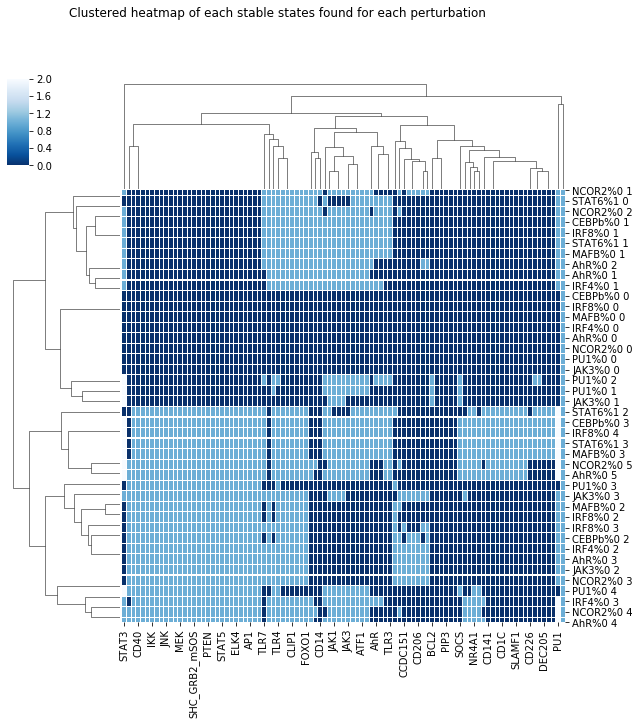

In [24]:
import seaborn as sns

'''List of perturbations with the nb of stable states '''
perturbstates=[]
trappedstates=[]

'''List of table state values same order as perturbStates'''
stablestates = [] 
tstates = [] 

'''List of nodes'''
nodelist = ['CSF2','IL4','CSF2R','IL4R','AhR','AP1','ATF1','BATF3','CEBPa','CEBPb','FOS','cMYC','CREB','ELK4','FOXO1','IRF4','IRF8','KLF4','MAFB','NFKB1_RelA','NFKB2','NR4A1','PRDM1','PU1','STAT3','STAT5','STAT6','USF1','NCOR2','JAK2','Src','PI3K','PIP3','AKT','PTEN','MEK1','MAGI1','CLIP1','mTORC1','SHC_GRB2_mSOS','RAS','RAF','MEK','ERK','JUN','JNK','TAU','CPLA2','FLT3','GSK3B','IKK','JAK3','JAK1','SHP1','CIITA','ITGAX','LnC_DC','IL4_gene','DUOX1','SLAMF1','MAOA','HLA_DR','ALOX15','TIMP3','DUSP6','CCL2','CCL22','TLR3','TLR4','TLR6','TLR7','TLR8','CD48','CD1A','CD1B','CD1C','CD40','CD86','CD83','CD209','CD141','CD226','DEC205','DCIR','Tet2','PTPN1','SOCS','CD14','SELL','CD163','CD206','MERTK','CCDC151','BCL2','BECN1']

for k,v in fixpointlist.items():   
    for i in range(0,len(v)):
        listSS = []
        for key, val in v[i].items():
            listSS.append(val)
        stablestates.append(listSS)
        perturbstates.append(str(k)+' '+str(i))

'''Create dataframe: columns = nodes, rows = perturbations'''
df = DataFrame(data=stablestates)
df.columns = nodelist
df.index = perturbstates

'''Generate clustered heatmap'''
cm = sns.clustermap(df, metric='euclidean', cmap = 'Blues_r', yticklabels=True, linewidths=0.1)
cm.fig.suptitle('Clustered heatmap of each stable states found for each perturbation')

'''#Save as figure
plt.savefig('heatmap_mutations18june2020.svg')'''

## Single perturbations using biolqm

In [ ]:
# Definition of PU.1 mutant
lqm_PU1_KO = biolqm.perturbation(lqm,"PU1%0")
# Generation of a python dataframe containing all stable states patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_PU1_KO, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

In [ ]:
# Definition of JAK3 mutant
lqm_JAK3_KO = biolqm.perturbation(lqm,"JAK3%0")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_JAK3_KO, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

In [ ]:
# Definition of NCOR2 mutant
lqm_NCOR2_KO = biolqm.perturbation(lqm,"NCOR2%0")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_NCOR2_KO, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

In [ ]:
# Definition of AhR mutant
lqm_AhR_KO = biolqm.perturbation(lqm,"AhR%0")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_AhR_KO, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

In [ ]:
# Definition of IRF4 mutant
lqm_IRF4_KO = biolqm.perturbation(lqm,"IRF4%0")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_IRF4_KO, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

In [ ]:
# Definition of STAT6 gain of function
lqm_STAT6_E1 = biolqm.perturbation(lqm,"STAT6%1")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_STAT6_E1, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

In [ ]:
# Definition of MAFB mutant
lqm_MAFB_KO = biolqm.perturbation(lqm,"MAFB%0")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_MAFB_KO, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

In [ ]:
# Definition of IRF8 mutant
lqm_IRF8_KO = biolqm.perturbation(lqm,"IRF8%0")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_IRF8_KO, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

In [ ]:
# Definition of CEBPb mutant
lqm_CEBPb_KO = biolqm.perturbation(lqm,"CEBPb%0")
# Generation of a python dataframe containing all stable state patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_CEBPb_KO, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

## Verification of comitment pattern reachability using pint

In [ ]:
# Translate the original model into a a discrete automata using bioloqm
lqm = ginsim.to_biolqm(lrg)
an = biolqm.to_pint(lqm)
# an stands for automata network
# Definition of an initial state corresponding to intial monocyte state but in the presence of CSF2 and IL4:
an = an.having(CSF2R=0,IL4R=0,AhR=1,CEBPb=0,IRF4=0,IRF8=1,KLF4=1,MAFB=0,PRDM1=0,PU1=1,STAT3=0,STAT6=1,NCOR2=0, CSF2=1, IL4=1)
# Definition of an initial state corresponding to intial monocyte state but in the presence of CSF2 but not IL4:
# an = an.having(CSF2R=0,IL4R=0,AhR=1,CEBPb=0,IRF4=0,IRF8=1,KLF4=1,MAFB=0,PRDM1=0,PU1=1,STAT3=0,STAT6=1,NCOR2=0, CSF2=1, IL4=0)
# Definition of an initial state corresponding to intial monocyte state but in the presence of IL4 but not CSF2:
#an = an.having(CSF2R=0,IL4R=0,AhR=1,CEBPb=0,IRF4=0,IRF8=1,KLF4=1,MAFB=0,PRDM1=0,PU1=1,STAT3=0,STAT6=1,NCOR2=0,CSF2=0,IL4=1)
# Definition of a target pattern corresponding to moDC in pint and verify its reachability for the wildtype model
#an.reachability("AhR=1,IRF4=1,CD1A=1,CD209=1")
an.reachability("CEBPb=1,MAFB=1")

# This may take about a minute on a personal computer...


## Stochastic simulations using MaBoSS

In [ ]:
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, ["AhR", "IRF4", "IRF8", "MAFB", "KLF4", "STAT6", "CD1A", "CD209", "CCDC151", "CD206","SELL","CD14"])

# Defining ON components at initial state, corresponding to moDC
# Per default, all nodes are set to zero at initial state
# ...
# commands to set the initial state, launch the simulation and display the results  
    mo_ON_Nodes = ('CSF2','IL4','AhR','AP1','ATF1','BATF3','FOS','CREB','ELK4','FOXO1','NR4A1','NFKB1_RelA','NFKB2','JAK2','PU1_b1','IRF8','STAT5','KLF4','STAT6','USF1','Src','PI3K','PTEN','MEK1','MAGI1','CLIP1','RAS','RAF','MEK','JUN','JNK','IKK')
    maboss.set_nodes_istate(mbs, mo_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_node_trajectory(until=40)
    simres.plot_entropy_trajectory(until=40)

In [ ]:
mb = ginsim.to_maboss(lrg)
#maboss.wg_set_output(mb)
maboss.set_output(mb, ["CD1A", "CD209", "CD14", "SELL", "CCDC151", "CD206"])
mb.update_parameters(time_tick=0.5, max_time=25, sample_count=1000)

### Maboss with CSF2 and IL4

In this section is the simulation for the model taking as inputs CSF2 an IL4

In [ ]:
mbCsf2IL4 = mb.copy()

In [ ]:
#maboss.wg_set_istate(mb)
maboss.set_nodes_istate(mbCsf2IL4, ["IL4", "CSF2"], [0, 1])

In [ ]:
%time resCI = mbCsf2IL4.run()

In [ ]:
%time resCI.plot_trajectory()
plt.savefig('csf2_il4.svg')

In [ ]:
resCI.plot_piechart(autopct=True)

### Maboss with IL4

In this section is the simulation for the model taking as input IL4

In [ ]:
mbIL4 = mb.copy()

In [ ]:
#maboss.wg_set_istate(mb)
maboss.set_nodes_istate(mbIL4, ["IL4"], [0, 1])

In [ ]:
%time resIL4 = mbIL4.run()

In [ ]:
%time resIL4.plot_trajectory()
plt.savefig('maboss_il4.svg')

In [ ]:
%time resIL4.plot_piechart(autopct=True)

### Maboss with CSF2

In this section is the simulation for the model taking as input CSF2

In [ ]:
mbCsf2 = mb.copy()

In [ ]:
#maboss.wg_set_istate(mb)
maboss.set_nodes_istate(mbCsf2, ["CSF2"], [0, 1])

In [ ]:
%time resCsf2 = mbCsf2.run()

In [ ]:
%time resCsf2.plot_trajectory()
plt.savefig('maboss_csf2.svg')

In [ ]:
resCsf2.plot_piechart(autopct=True)